# Jamboree Education - Linear Regression

### Importing Libraries

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


### Importing modules or packages for linear Regression.

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy import stats

### Downloading Dataset

In [18]:
df=pd.read_csv('Jamboree_Admission.csv')
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         500 non-null    int64  
 1   GRE Score          500 non-null    int64  
 2   TOEFL Score        500 non-null    int64  
 3   University Rating  500 non-null    int64  
 4   SOP                500 non-null    float64
 5   LOR                500 non-null    float64
 6   CGPA               500 non-null    float64
 7   Research           500 non-null    int64  
 8   Chance of Admit    500 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 35.3 KB


In [22]:
df.nunique()

Serial No.           500
GRE Score             49
TOEFL Score           29
University Rating      5
SOP                    9
LOR                    9
CGPA                 184
Research               2
Chance of Admit       61
dtype: int64

In [61]:
cat_cols = ['University Rating', 'SOP', 'LOR ', 'Research']
num_cols = ['GRE Score', 'TOEFL Score', 'CGPA']
target = 'Chance of Admit '

In [63]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000,500.000000,500.000000,500.00000
mean,250.500000,316.472000,107.192000,3.114000,3.374000,3.48400,8.576440,0.560000,0.72174
std,144.481833,11.295148,6.081868,1.143512,0.991004,0.92545,0.604813,0.496884,0.14114
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.34000
25%,125.750000,308.000000,103.000000,2.000000,2.500000,3.00000,8.127500,0.000000,0.63000
50%,250.500000,317.000000,107.000000,3.000000,3.500000,3.50000,8.560000,1.000000,0.72000
75%,375.250000,325.000000,112.000000,4.000000,4.000000,4.00000,9.040000,1.000000,0.82000
max,500.000000,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.97000


In [66]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

## Explorartory Data Analysis - Univariate,Bivariate and Multivariate analysis


### Univariate Analysis

In [71]:
print(df.columns)

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')


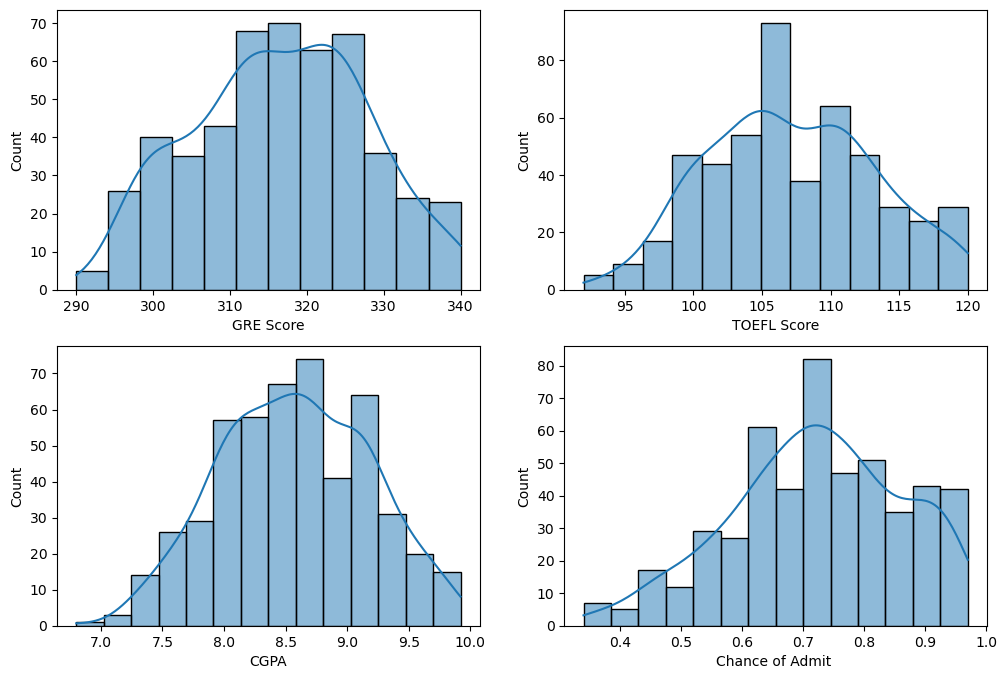

In [73]:
### check distribution of each numerical variable

rows, cols = 2, 2
fig, axs = plt.subplots(rows,cols, figsize=(12, 8))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.histplot(df[num_cols[index]], kde=True, ax=axs[row,col])
        index += 1
    break

sns.histplot(df[num_cols[-1]], kde=True, ax=axs[1,0])
sns.histplot(df[target], kde=True, ax=axs[1,1])

plt.show()

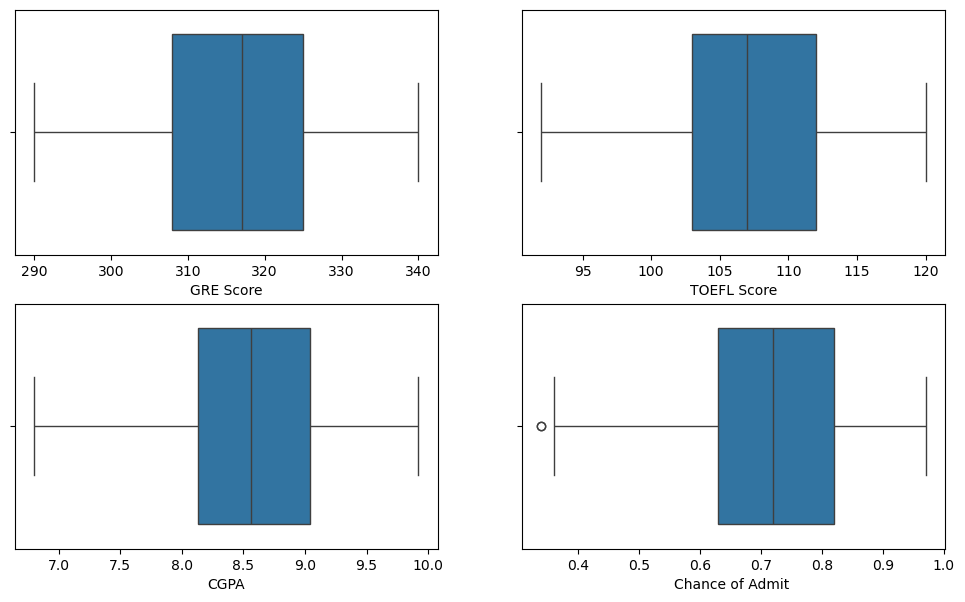

In [75]:
# check for outliers using boxplots

rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(12, 7))
index = 0
for col in range(cols):
 sns.boxplot(x=num_cols[index], data=df, ax=axs[0,index])
 index += 1

sns.boxplot(x=num_cols[-1], data=df, ax=axs[1,0])
sns.boxplot(x=target, data=df, ax=axs[1,1])
plt.show()

In [ ]:
## There are no outliers

In [77]:
# check unique values in categorical variables

for col in cat_cols:
 print("Column: {:18} Unique values: {}".format(col, df[col].nunique()))


Column: University Rating  Unique values: 5
Column: SOP                Unique values: 9
Column: LOR                Unique values: 9
Column: Research           Unique values: 2


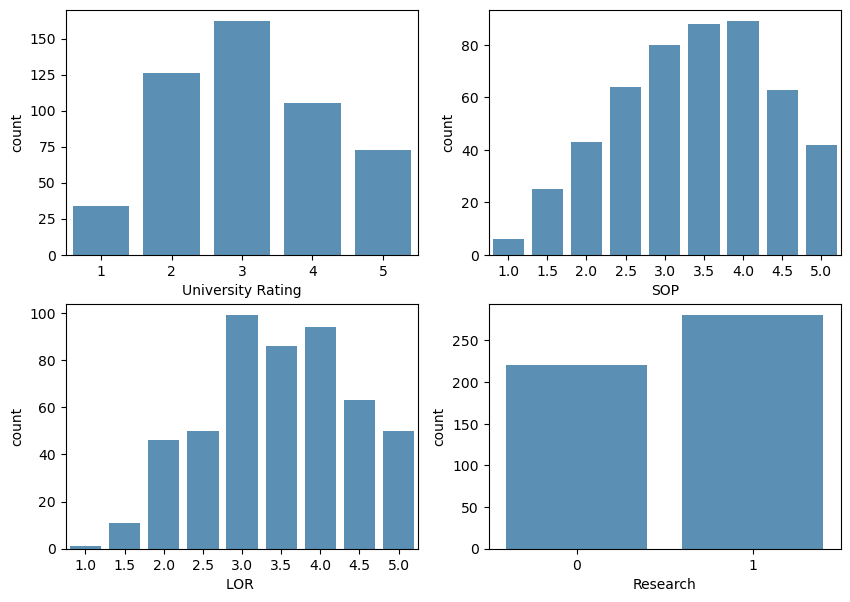

In [81]:
# countplots for categorical variables

cols, rows = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(10, 7))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.countplot(x=cat_cols[index], data=df, ax=axs[row, col], alpha=0.8)
        index += 1

plt.show()

## Bivariate Analysis

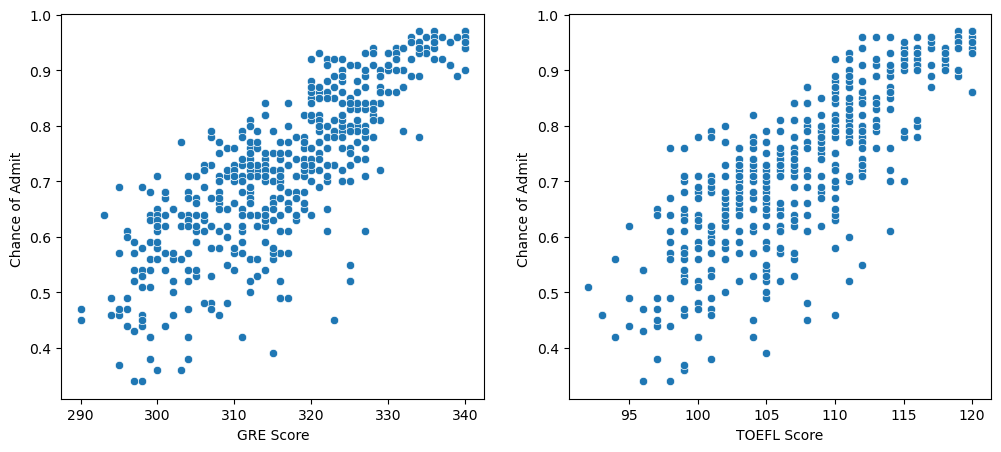

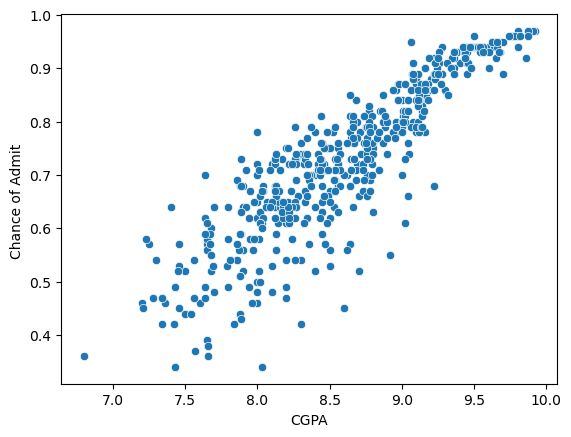

In [84]:
# check relation between continuous variables & target variable

fig, axs = plt.subplots(1, 2, figsize=(12,5))
sns.scatterplot(x=num_cols[0], y=target, data=df, ax=axs[0])
sns.scatterplot(x=num_cols[1], y=target, data=df, ax=axs[1])
plt.show()
sns.scatterplot(x=num_cols[2], y=target, data=df)
plt.show()

In [ ]:
 linear correlation between the continuous variables and the target variable.


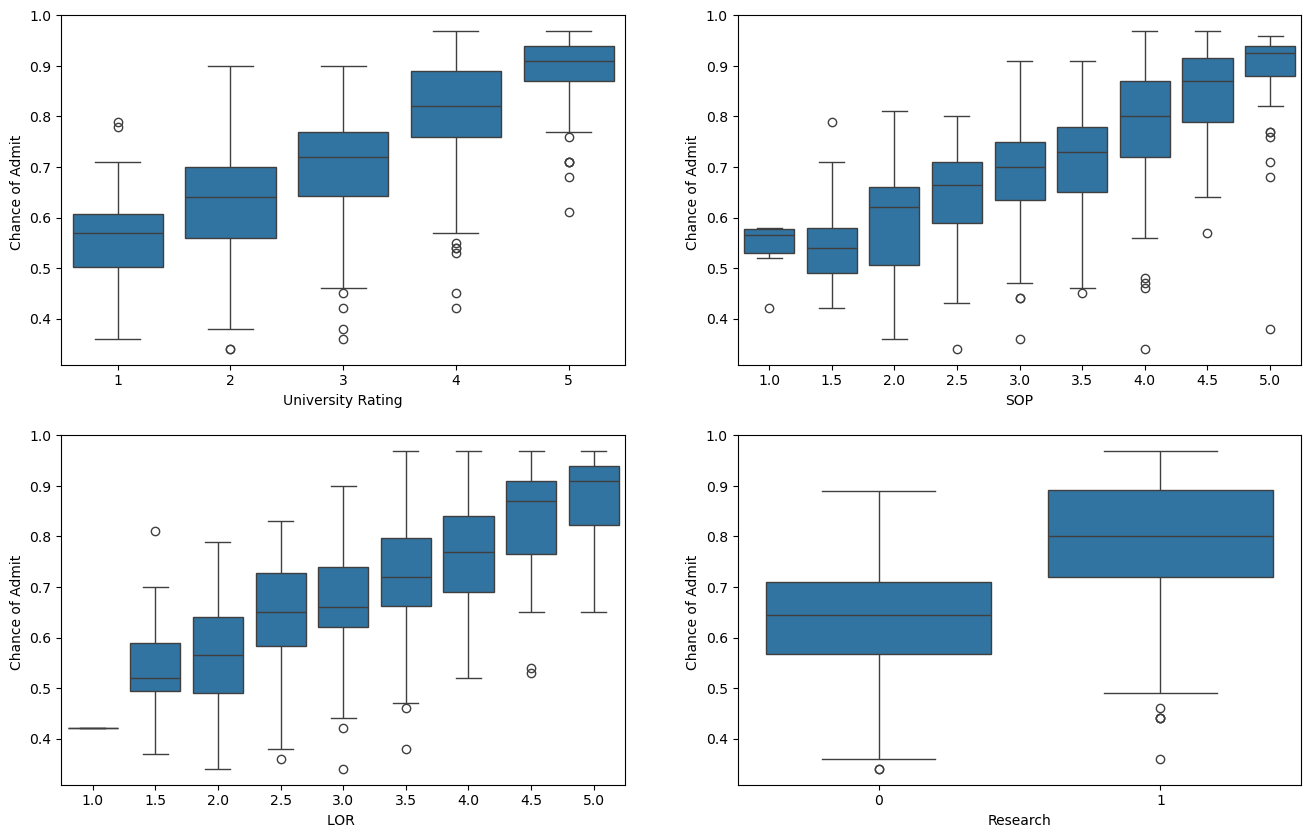

In [88]:
rows, cols = 2,2
fig, axs = plt.subplots(rows, cols, figsize=(16,10))
index = 0
for row in range(rows):
    for col in range(cols):
        sns.boxplot(x=cat_cols[index], y=target, data=df, ax=axs[row,col])
        index += 1

From the above graphs,we can see that as the target rating increases the Chance of Admit also increases. Students who have the research experience have more chances of Admin as compared to other students who don't have the research experience.


### Multivariate Analysis

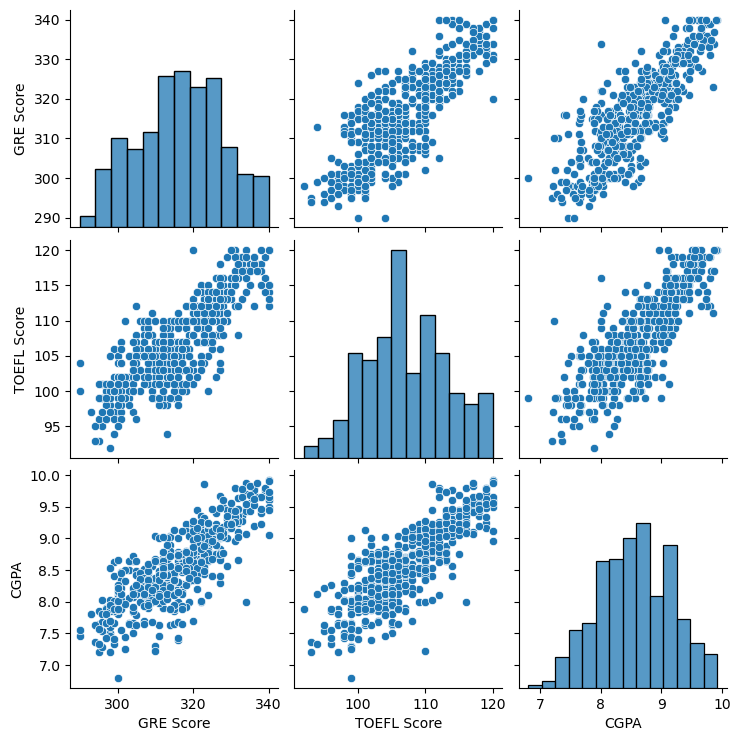

In [94]:
sns.pairplot(df[num_cols])
plt.show()

In [ ]:
Independent continuous variables are also correlated with each other

In [96]:
df.corr()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
Serial No.,1.000000,-0.103839,-0.141696,-0.067641,-0.137352,-0.003694,-0.074289,-0.005332,0.008505
GRE Score,-0.103839,1.000000,0.827200,0.635376,0.613498,0.524679,0.825878,0.563398,0.810351
TOEFL Score,-0.141696,0.827200,1.000000,0.649799,0.644410,0.541563,0.810574,0.467012,0.792228
University Rating,-0.067641,0.635376,0.649799,1.000000,0.728024,0.608651,0.705254,0.427047,0.690132
SOP,-0.137352,0.613498,0.644410,0.728024,1.000000,0.663707,0.712154,0.408116,0.684137
LOR,-0.003694,0.524679,0.541563,0.608651,0.663707,1.000000,0.637469,0.372526,0.645365
CGPA,-0.074289,0.825878,0.810574,0.705254,0.712154,0.637469,1.000000,0.501311,0.882413
Research,-0.005332,0.563398,0.467012,0.427047,0.408116,0.372526,0.501311,1.000000,0.545871
Chance of Admit,0.008505,0.810351,0.792228,0.690132,0.684137,0.645365,0.882413,0.545871,1.000000


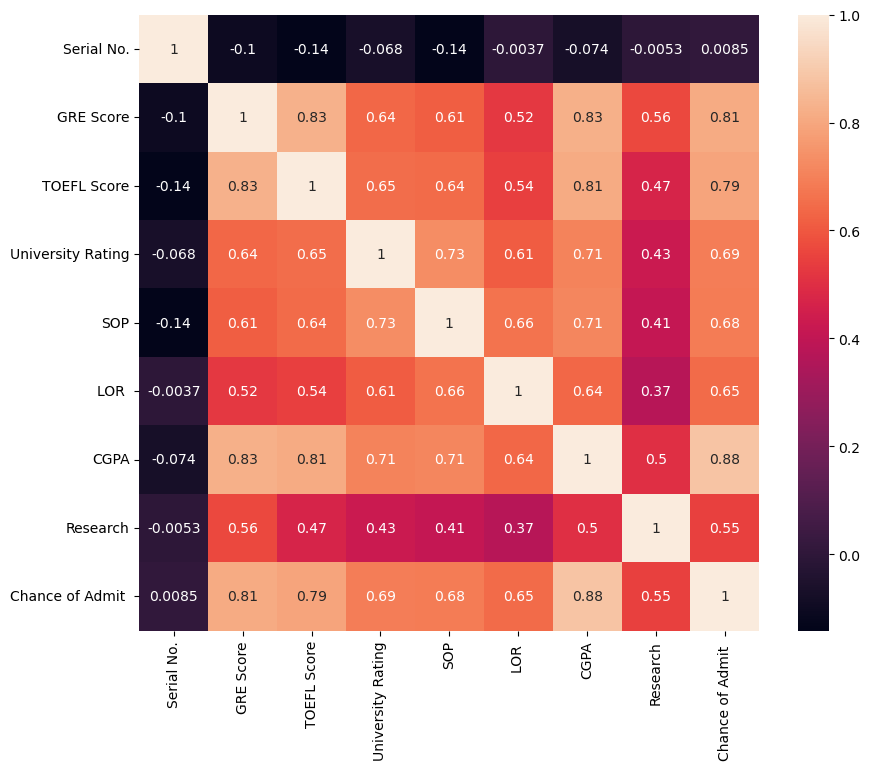

In [98]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

## Data Preprocessing


In [101]:
df = df.drop(columns=['Serial No.'], axis=1)

In [103]:
df.duplicated().sum()


0

## Data preparation for model building

In [110]:
X = df.drop(columns=[target])
y = df[target]

In [112]:
X.shape,y.shape

((500, 7), (500,))

In [116]:
# standardize the dataset using train_test_split

sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)


(350, 7) (350,)
(150, 7) (150,)


In [118]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [120]:
# weights
model.coef_


array([0.02516588, 0.02082652, 0.00353571, 0.00149993, 0.01407119,
       0.06995721, 0.01029979])

In [122]:
model.intercept_


0.7235029157144238

## Model Building

In [146]:
def adjusted_r2(r2, p, n):
    """
    n: no of samples
    p: no of predictors
    r2: r2 score
    """
    adj_r2 = 1 - ((1-r2)*(n-1) / (n-p-1))
    return adj_r2

def get_metrics(y_true, y_pred, p=None):
    n = y_true.shape[0]
    mse = np.sum((y_true - y_pred)**2) / n
    rmse = np.sqrt(mse)
    mae = np.mean(np.abs(y_true - y_pred))
    score = r2_score(y_true, y_pred)
    adj_r2 = None
    if p is not None:
        adj_r2 = adjusted_r2(score, p, n)

    res = {
        "mean_absolute_error": round(mae, 2),
        "rmse": round(rmse, 2),
        "r2_score": round(score, 2),
        "adj_r2": round(adj_r2, 2)
        }
    return res


In [152]:
def train_model(X_train, y_train, X_test, y_test,cols, model_name="linear", alpha=1):
    model = None
    if model_name == "lasso":
        model = Lasso(alpha=alpha)
    elif model_name == "ridge":
        model = Ridge(alpha=alpha)
    else:
        model = LinearRegression()

    model.fit(X_train, y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    p = X_train.shape[1]
    train_res = get_metrics(y_train, y_pred_train, p)
    test_res = get_metrics(y_test, y_pred_test, p)


    print(f"\n---- {model_name.title()} Regression Model ----\n")
    print(f"Train MAE: {train_res['mean_absolute_error']} Test MAE: {test_res['mean_absolute_error']}")
    print(f"Train RMSE: {train_res['rmse']} Test RMSE: {test_res['rmse']}")
    print(f"Train R2_score: {train_res['r2_score']} Test R2_score: {test_res['r2_score']}")
    print(f"Train Adjusted_R2: {train_res['adj_r2']} Test Adjusted_R2: {test_res['adj_r2']}")
    print(f"Intercept: {model.intercept_}")

    #print(len(df.columns), len(model.coef_))
    coef_df = pd.DataFrame({"Column": cols, "Coef": model.coef_})
    print(coef_df)
    print("-"*50)
    return model

    


In [154]:
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "linear")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "ridge")
train_model(X_train, y_train, X_test, y_test,df.columns[:-1], "lasso", 0.001)


---- Linear Regression Model ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.83
Train Adjusted_R2: 0.81 Test Adjusted_R2: 0.82
Intercept: 0.7235029157144238
              Column      Coef
0          GRE Score  0.025166
1        TOEFL Score  0.020827
2  University Rating  0.003536
3                SOP  0.001500
4               LOR   0.014071
5               CGPA  0.069957
6           Research  0.010300
--------------------------------------------------

---- Ridge Regression Model ----

Train MAE: 0.04 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.82 Test R2_score: 0.83
Train Adjusted_R2: 0.81 Test Adjusted_R2: 0.82
Intercept: 0.7235017869555453
              Column      Coef
0          GRE Score  0.025355
1        TOEFL Score  0.020937
2  University Rating  0.003664
3                SOP  0.001691
4               LOR   0.014119
5               CGPA  0.069240
6           Research  0.010310
------------------

Lasso(alpha=0.001)

In [ ]:
Model is not overfitting, Results for Linear, Ridge and Lasso are the same. R2_score and Adjusted_r2 are almost the same. Hence there are no unnecessary independent variables in
the data

## Linear Regression Model - Assumption Test

### 1.Mutlicollinearity Check

In [158]:
def vif(newdf):
    vif_data = pd.DataFrame() # VIF dataframe
    vif_data["feature"] = newdf.columns
    
    # calculating VIF for each feature
    vif_data["VIF"] = [variance_inflation_factor(newdf.values, i)
    for i in range(len(newdf.columns))]
    return vif_data

In [160]:
res = vif(df.iloc[:,:-1])
res

,feature,VIF
0,GRE Score,1308.061089
1,TOEFL Score,1215.951898
2,University Rating,20.933361
3,SOP,35.265006
4,LOR,30.911476
5,CGPA,950.817985
6,Research,2.869493


In [162]:
# drop GRE Score and again calculate the VIF

res = vif(df.iloc[:, 1:-1])
res

,feature,VIF
0,TOEFL Score,639.741892
1,University Rating,19.884298
2,SOP,33.733613
3,LOR,30.631503
4,CGPA,728.778312
5,Research,2.863301


In [164]:
# drop TOEFL Score and again calculate the VIF
res = vif(df.iloc[:,2:-1])
res

,feature,VIF
0,University Rating,19.777410
1,SOP,33.625178
2,LOR,30.356252
3,CGPA,25.101796
4,Research,2.842227


In [166]:
# Now lets drop the SOP and again calculate VIF

res = vif(df.iloc[:,2:-1].drop(columns=['SOP']))
res


,feature,VIF
0,University Rating,15.140770
1,LOR,26.918495
2,CGPA,22.369655
3,Research,2.819171


In [168]:
# lets drop the LOR as well

newdf = df.iloc[:,2:-1].drop(columns=['SOP'])
newdf = newdf.drop(columns=['LOR '], axis=1)
res = vif(newdf)
res

,feature,VIF
0,University Rating,12.498400
1,CGPA,11.040746
2,Research,2.783179


In [170]:
# drop the University Rating
newdf = newdf.drop(columns=['University Rating'])
res = vif(newdf)
res


,feature,VIF
0,CGPA,2.455008
1,Research,2.455008


In [ ]:
## Retrain the model

In [172]:
# again train the model with these only two features

X = df[['CGPA', 'Research']]
sc = StandardScaler()
X = sc.fit_transform(X)

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [176]:
model = train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "linear")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "ridge")
train_model(X_train, y_train, X_test, y_test, ['CGPA', 'Research'], "lasso", 0.001)


---- Linear Regression Model ----

Train MAE: 0.05 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.79 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7239951605317704
     Column      Coef
0      CGPA  0.115243
1  Research  0.018951
--------------------------------------------------

---- Ridge Regression Model ----

Train MAE: 0.05 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.79 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7239942894114957
     Column      Coef
0      CGPA  0.114835
1  Research  0.019091
--------------------------------------------------

---- Lasso Regression Model ----

Train MAE: 0.05 Test MAE: 0.04
Train RMSE: 0.06 Test RMSE: 0.06
Train R2_score: 0.79 Test R2_score: 0.81
Train Adjusted_R2: 0.78 Test Adjusted_R2: 0.81
Intercept: 0.7239988747376698
     Column      Coef
0      CGPA  0.114537
1  Research  0.018286
------------------------------------------------

Lasso(alpha=0.001)

In [ ]:
After removing collinear features using VIF and using only two features, R2_score and Adjusted_r2 are still the same as before the testing dataset.

### 2.Mean of Residuals

It is clear from RMSE that Mean of Residuals is almost zero.

### 3. Linearity of variables

In [ ]:
It is quite clear from EDA that independent variables are linearly dependent on the target variables.


### 4.Normality

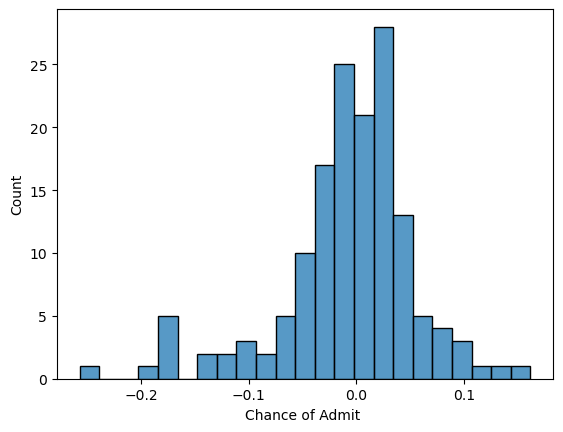

In [184]:
y_pred = model.predict(X_test)
residuals = (y_test - y_pred)
sns.histplot(residuals)
plt.show()


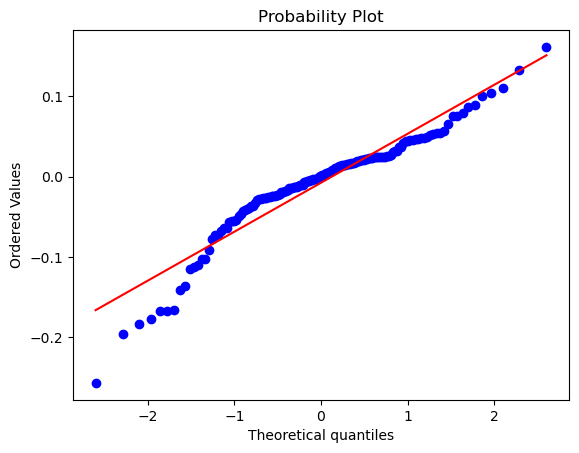

In [186]:
stats.probplot(residuals, plot=plt)
plt.show()

## 5. Homoscedasticity


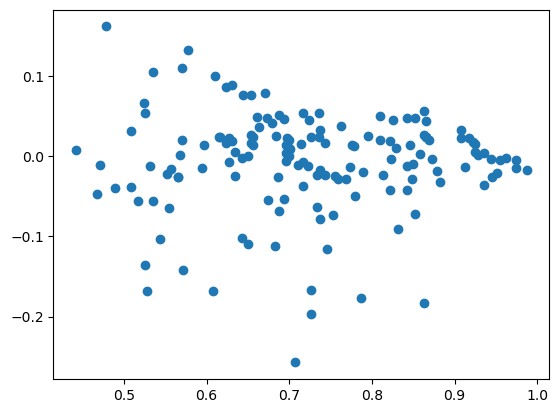

In [189]:
plt.scatter(y_pred, residuals)
plt.show()

As the above plot is not creating any cone type shape,there is no homoscedasticity present in the data.

## Insights

1. Multicollinearity is present in the data.
2. After removing collinear features there are only two variables which are important in making predictions for the target variables.
3. Independent variables are linearly correlated with dependent variables.


## Recommendations

In [ ]:
1. CGPA and Research are the only two variables which are important in making the prediction for Chance of Admit.
2. CGPA is the most important variable in making the prediction for the Chance of Admit.
3. Following are the final model results on the test data: RMSE: 0.07 MAE: 0.05 R2_score:0.81 Adjusted_R2: 0.81
